<a href="https://colab.research.google.com/github/spidervamsi/MedicalTweetsAnalysis/blob/master/NER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
import numpy as np
import re

In [3]:
usecols = (4,6)
dataframe = pd.read_table("/content/task3_training.tsv",usecols=usecols)
dataframe

,extraction,tweet
0,NaN,@seefisch:oral drugs for pyelonephritis:ciprof...
1,NaN,happy for wellbutrin; has similar effects as a...
2,NaN,@stilgarg i'm ok ty have an official diagnosis...
3,NaN,i'm soo depressed cymbalta couldn't help me .
4,NaN,time for my daily afternoon relaxation ritual ...
...,...,...
2241,NaN,i will admit that most people would agree zypr...
2242,gain so much weight,that zyprexa really makes your vocal chords ma...
2243,NaN,@incubator04 i'm hoping that i get on the zypr...
2244,increase my weight,"i'm so fine today. increasing zyprexa,my condi..."


In [0]:
import re
import string
from bs4 import BeautifulSoup

#for tweet in tweet_data:
def preprocess_tweet(tweet):
    # Clean the training data
    # print(tweet)
    
    #Escaping HTML characters
    tweet = BeautifulSoup(tweet).get_text()
    
    #lowercase
    tweet = tweet.lower()
    
    #remove links
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))','',tweet)
    
    #Remove usernames
    tweet = re.sub('@[^\s]+','', tweet)
    
    # replace hashtags by just words
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    
    #Removal of Punctuation
    tweet = ' '.join(re.sub("[\.\,\!\?\:\;\-\=]", " ", tweet).split())
    
    #correct all multiple white spaces to a single white space
    tweet = re.sub('[\s]+', ' ', tweet)
   
    #remove space at the beginning and the end
    tweet = tweet.strip()
    # print(tweet)
    
    return tweet 
    
        
#     # remove special characters, numbers, punctuations
#     text = text.replace("[^a-zA-Z#]", " ")
#     # Additional clean up : removing words less than 3 chars, and remove space at the beginning and the end
#     text = re.sub(r'\W*\b\w{1,3}\b', '', text)

In [5]:
x = "we aren't"
preprocess_tweet(x)

"we aren't"

In [0]:
train_data=[]
for tweet in dataframe.iterrows():
  tweet_txt = tweet[1][1].lower()
  tweet_txt = preprocess_tweet(tweet_txt)
  data = []
  entities = []
  data.append(tweet_txt)
  if not pd.isnull(tweet[1][0]):
    extra_txt_s =   preprocess_tweet(tweet[1][0])
    start=tweet_txt.find(extra_txt_s)
    end = 0
    extra_txt_s = extra_txt_s.split()
    for extra_txt in extra_txt_s:        
      end = start+len(extra_txt)
      entities.append((start, end, "ADR"))
      start = end+1
  adr_data = {"entities": entities}
  data.append(adr_data)
  train_data.append(tuple(data))

  # break

In [7]:
train_data

[('drugs for pyelonephritis ciprofloxacin levofloxacin tmp/smz do not use nitrofurantoin for pyelo(only cystitis)',
  {'entities': []}),
 ('happy for wellbutrin has similar effects as adderall trazodone is super promising for sleep but abilify can cause weight gain _',
  {'entities': []}),
 ("i'm ok ty have an official diagnosis of bipolar now feeling ok at the moment lamotrigine has been increased having monotherapy /",
  {'entities': []}),
 ("i'm soo depressed cymbalta couldn't help me", {'entities': []}),
 ('time for my daily afternoon relaxation ritual of smoking weed taking 2 mgs of clonazepam and 400 mg of seroquel xr',
  {'entities': []}),
 ("questionable x ray result nothing a little levaquin won't help oh yeah and the cough meds with codeine",
  {'entities': []}),
 ('does nicotine gum actually help with quitting smoking', {'entities': []}),
 ('third night of diarrhea and first dose of norfloxacin gosh gonna die of dehydration',
  {'entities': []}),
 ('prescribed wellbutrin and

In [0]:
usecols = (4,6)
dataframe = pd.read_table("/content/task3_validation.tsv",usecols=usecols)
eval_data=[]
for tweet in dataframe.iterrows():
  tweet_txt = tweet[1][1].lower()
  tweet_txt = preprocess_tweet(tweet_txt)
  data = []
  entities = []
  data.append(tweet_txt)
  if not pd.isnull(tweet[1][0]):
    extra_txt_s =   preprocess_tweet(tweet[1][0])
    start=tweet_txt.find(extra_txt_s)
    end = 0
    extra_txt_s = extra_txt_s.split()
    for extra_txt in extra_txt_s:        
      end = start+len(extra_txt)
      entities.append((start, end, "ADR"))
      start = end+1
  adr_data = {"entities": entities}
  data.append(adr_data)
  eval_data.append(tuple(data))


In [0]:
from __future__ import unicode_literals, print_function

import plac
import random
from pathlib import Path
import spacy
from spacy.util import minibatch, compounding
from spacy.gold import GoldParse
from spacy.scorer import Scorer

In [0]:
test_score = 0
def evaluate(ner_model, examples):

    scorer = Scorer()
    for input_, annot in examples:
        doc_gold_text = ner_model.make_doc(input_)
        gold = GoldParse(doc_gold_text, entities=annot.get('entities'))
        pred_value = ner_model(input_)
        scorer.score(pred_value, gold)
        test_score = scorer.scores
    return scorer.scores

In [0]:
results = []
def main(train_data,model=None, output_dir=None, n_iter=5):
    """Load the model, set up the pipeline and train the entity recognizer."""
    if model is not None:
        nlp = spacy.load(model)  # load existing spaCy model
        print("Loaded model '%s'" % model)
    else:
        nlp = spacy.blank("en")  # create blank Language class
        print("Created blank 'en' model")

    # create the built-in pipeline components and add them to the pipeline
    # nlp.create_pipe works for built-ins that are registered with spaCy
    if "ner" not in nlp.pipe_names:
        ner = nlp.create_pipe("ner")
        nlp.add_pipe(ner, last=True)
    # otherwise, get it so we can add labels
    else:
        ner = nlp.get_pipe("ner")

    # # add labels
    # for _, annotations in TRAIN_DATA:
    #     for ent in annotations.get("entities"):
    ner.add_label("ADR")

    # get names of other pipes to disable them during training
    pipe_exceptions = ["ner", "trf_wordpiecer", "trf_tok2vec"]
    other_pipes = [pipe for pipe in nlp.pipe_names if pipe not in pipe_exceptions]
    with nlp.disable_pipes(*other_pipes):  # only train NER
        # reset and initialize the weights randomly – but only if we're
        # training a new model
        # if model is None:
        #     nlp.begin_training()
        optimizer = nlp.begin_training()
        for itn in range(n_iter):
            random.shuffle(train_data)
            losses = {}
            # batch up the examples using spaCy's minibatch
            # for data in train_data:
            #   if len(data) == 2:
            #     nlp.update(
            #         [data[0]],  # batch of texts
            #         [data[1]],  # batch of annotations
            #         drop=0.2,  # dropout - make it harder to memorise data
            #         sgd=optimizer,  # callable to update weights
                    # losses=losses)
            for data in train_data:
              if len(data) == 2:
                nlp.update(
                    [data[0]],  # batch of texts
                    [data[1]],  # batch of annotations
                    drop=0.2,  # dropout - make it harder to memorise data
                    sgd=optimizer,  # callable to update weights
                    losses=losses)
            results.append(evaluate(nlp,eval_data))
              # else:
              #   nlp.update(
              #       [data[0]],  # batch of texts
              #       # [data[1]],  # batch of annotations
              #       drop=0.2,  # dropout - make it harder to memorise data
              #       sgd=optimizer,  # callable to update weights
              #       losses=losses)
            print("Losses", losses)
        if output_dir is not None:
            output_dir = Path(output_dir)
            if not output_dir.exists():
                output_dir.mkdir()
            nlp.meta["name"] = "NER_Model"  # rename model
            nlp.to_disk(output_dir)
            print("Saved model to", output_dir)

    # test the trained model
    for text, _ in train_data:
        doc = nlp(text)
        # print("Entities", [(ent.text, ent.label_) for ent in doc.ents])
        # print("Tokens", [(t.text, t.ent_type_, t.ent_iob) for t in doc])

    # # save model to output directory
    # if output_dir is not None:
    #     output_dir = Path(output_dir)
    #     if not output_dir.exists():
    #         output_dir.mkdir()
    #     nlp.to_disk(output_dir)
    #     print("Saved model to", output_dir)

    #     # test the saved model
    #     print("Loading from", output_dir)
    #     nlp2 = spacy.load(output_dir)
        # for text, _ in TRAIN_DATA:
    #         doc = nlp2(text)
    #         print("Entities", [(ent.text, ent.label_) for ent in doc.ents])
    #         print("Tokens", [(t.text, t.ent_type_, t.ent_iob) for t in doc])

In [12]:
main(train_data=train_data,model='en_core_web_sm',output_dir="/content/",n_iter=15)

Loaded model 'en_core_web_sm'
Losses {'ner': 15624.500347973451}
Losses {'ner': 15821.592482926808}
Losses {'ner': 15912.524234563009}
Losses {'ner': 15619.206751870519}
Losses {'ner': 15575.915559487252}
Losses {'ner': 15731.768099361854}
Losses {'ner': 15443.488310994253}
Losses {'ner': 15622.903268895985}
Losses {'ner': 15610.66624214743}
Losses {'ner': 15251.983155707409}
Losses {'ner': 15318.608175926202}
Losses {'ner': 15387.83084164629}
Losses {'ner': 15702.785313391414}
Losses {'ner': 15659.100466087602}
Losses {'ner': 15532.948762607975}
Saved model to /content


In [13]:

eval_data

[('do you have any medication allergies "asthma " me " " pt "no wait avelox that\'s it " "so no other allergies " "right " *cont',
  {'entities': [(27, 36, 'ADR')]}),
 ('if avelox has hurt your liver avoid tylenol always as it further damages liver eat grapefruit unless taking cardiac drugs',
  {'entities': [(14, 18, 'ADR'), (19, 23, 'ADR'), (24, 29, 'ADR')]}),
 ('apparently baclofen greatly exacerbates the "ad" part of my adhd average length of focus today about 30 seconds',
  {'entities': [(45, 47, 'ADR')]}),
 ('apparently baclofen greatly exacerbates the "ad" part of my adhd average length of focus today about 30 seconds',
  {'entities': [(83, 88, 'ADR')]}),
 ('pt of mine died from cipro rt if only more doctors thought like you i lost my entire life to 12 cipro pills',
  {'entities': [(11, 15, 'ADR')]}),
 ('the only pt of mine who ever died was one age 21 profound autism chronic underwt & gi issues given lots of cipro terrible',
  {'entities': [(29, 33, 'ADR')]}),
 ("owww i hurt my 

In [0]:
result_p=[]
result_r=[]
result_f=[]
for result in results:
  result_p.append(result['ents_per_type']['ADR']['p'])
  result_r.append(result['ents_per_type']['ADR']['r'])
  result_f.append(result['ents_per_type']['ADR']['f'])

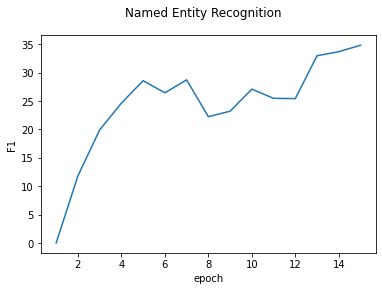

In [35]:
import matplotlib.pyplot as plt
plt.plot(list(range(1,16)),result_f)
plt.ylabel('F1')
plt.xlabel('epoch')
plt.suptitle('Named Entity Recognition')
plt.show()

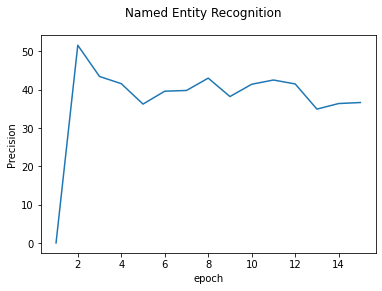

In [36]:
plt.plot(list(range(1,16)),result_p)
plt.ylabel('Precision')
plt.xlabel('epoch')
plt.suptitle('Named Entity Recognition')
plt.show()

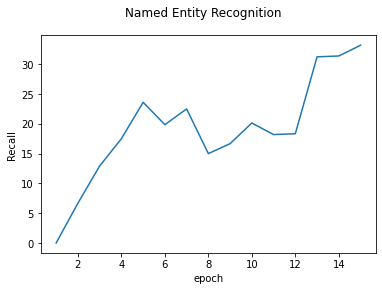

In [37]:
plt.plot(list(range(1,16)),result_r)
plt.ylabel('Recall')
plt.xlabel('epoch')
plt.suptitle('Named Entity Recognition')
plt.show()